Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolás Guarín-Zapata 2019-2020. Este material es parte del curso Modelación Computacional en el programa de Ingeniería Civil de la Universidad EAFIT.

# Determinación de raíces

## Introducción

El problema de determinar las raíces o ceros de una función aparece de manera frecuente en múltiples problemas de ingeniería. En este esta tarea debe desarrollar 2 de los métodos mas usados para su solución. 
- El método de Bisección 
- El método de Newton-Raphson. 

Punto 1. Determinación de tensiones extremas en un sólido elástico

En un problema de análisis de tensiones para un sólido elástico se encuentra que los máximos esfuerzos $\sigma$ son las raíces del polinomio caracteristico correspondiente a la siguiente función:

\begin{equation}
f(\sigma)=\sigma ^3 -200 \sigma ^2 -100000 \sigma
\end{equation}

y en donde $\sigma \in [-500 , 500].$ Para efectos de verificar si una condición de diseño del sólido es apropiada se requiere determinar los valores extremos.<sup>[Ref 1](#Referencias)</sup>


In [1]:
# Esta línea permite tener gráficos interactivos en el notebook
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Paso 1: localización inicial de las raíces


Inicialmente haremos una búsqueda o localización, de baja precisión, de las raíces para posteriormente afinar los valores usando métodos más formales. Como estrategia inicial para localizar las raíces es conveniente graficar la función. En el siguiente bloque de código usaremos la función **lambda** de Python para definir la función y su derivada.

In [3]:
fun  = lambda x: x**3 - 200.0*x**2 - 100000.0*x
deriv = lambda x: 3.0*x**2 - 400.0*x - 100000.0

Y luego la graficamos.

<IPython.core.display.Javascript object>


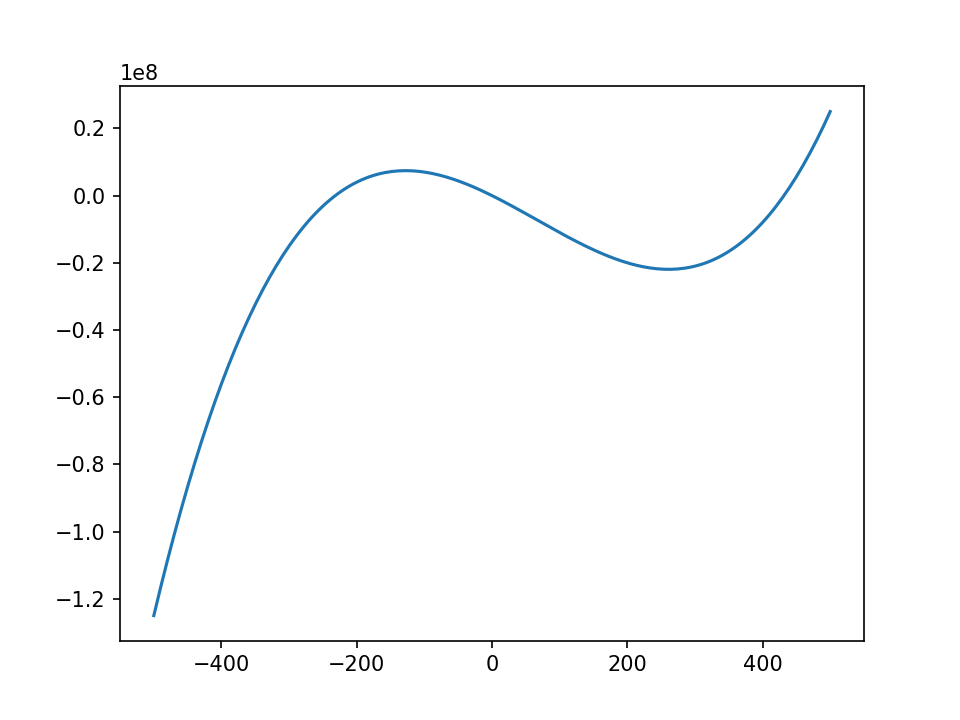

In [4]:
npts = 200
x = np.linspace(-500, 500, npts)
y = fun(x)
plt.figure()
plt.plot(x, y)

<div class="alert alert-warning">

**Preguntas**
    
- Modificar los ejes de la gráfica y adicionar una cuadricula para facilitar la  identificación aproximada de las raíces.

- ¿Cuáles son los valores aproximados de las raíces que se obtienen de la gráfica?
</div>

Para hacer la búsqueda inicial usaremos el algoritmo de _bracketing_ el cual recibe como parámetros de entrada la función, los extremos del intervalo de búsqueda y el número de intervalos a considerar. En el siguiente bloque de código definimos la función **bracketing()** de manera que esta pueda ser utilizada de forma general.

In [5]:
# Comentar apropiadamente el siguiente código
def bracketing(fun, a, b, N):
    """Estimate the root of a real function using bracketing

    Parameters
    ----------
    fun : function
        Function.
    a : float
        Initial point of the interval.
    b : float
        Final point of the interval.
    N : int
        Number of subdivisions for the interval

    Returns
    -------
    xR : list
        List with intervals where a change of sign was found.
    msg : string
        Message regarding the success of the method.
    """
    msg = "Maximum number of iterations reached."
    dx = (b - a)/(N - 1)
    iroot = 0
    x2 = a
    xR = []
    for i in range(0, N):
        x1 = x2
        x2 = x1 + dx
        if (fun(x1) * fun(x2)) < 0:
            msg = "A change of sign was found."
            iroot = iroot + 1
            xR.append([x1, x2])
    return xR, msg

En el uso de la rutina de búsqueda partiremos el dominio del problema en $N = 100$ sub-intervalos de manera que tendremos:

$$\triangle\sigma=\frac{b-a}{100}\equiv\frac{1000}{100}$$

<div class="alert alert-warning">

**Preguntas**
    
- ¿Qué tan cercanas son las raíces encontradas por la rutina con las identificadas en la gráfica?

- ¿Qué pasa si se cambia el valor del numero de sub-intervalos en la operación de bracketing?
</div>

In [6]:
xR, msg = bracketing(fun, -500, 500, 10)
xR

[[-277.7777777777778, -166.6666666666667],
 [-55.5555555555556, 55.555555555555515],
 [388.8888888888888, 499.9999999999999]]

### Paso 2a: Afinación de la raíz por el método de bisección

El método de bisección consiste en la partición por mitades e identificación de la mitad en la que se presenta el cambio de signo, como se muestra en la figura. El método cada vez toma un sub-intervalo de menor tamaño variando la posición del punto $x_3$.


<center>
    <img src="img/biseccion.svg"
         alt="Esquema ilustrando el método de bisección."
         style="width:500px">
</center>

A continuación se presenta el método de bisección que toma como parámetros de entrada la función; los valores extremos del intervalo de búsqueda $a$ y $b$; y 2 valores de tolerancia usados para detectar la presencia de una raíz ya sea por el tamaño del intervalo de búsqueda o por la cercanía con cero del valor de la función.

In [7]:
# Comentar apropiadamente el siguiente código
def bisection(fun, a, b, niter=50, ftol=1e-12, verbose=False):
    """Use bisection method to estimate the root of a real function

    Parameters
    ----------
    fun : function
        Function.
    grad : function
        Derivative of the function.
    a : float
        Initial point of the interval.
    b : float
        Final point of the interval.
    niter : int, optional
        Maximum number of iterations.
    ftol : float, optional
        Tolerance for the root.
    verbose : bool, optional
        If True, prints each iteration.

    Returns
    -------
    x : float
        Approximated root.
    msg : string
        Message regarding the success of the method.
    """
    if fun(a) * fun(b) > 0:
        c = None
        msg = "The function should have a sign change in the interval."
    else:
        for cont in range(niter):
            c = 0.5*(a + b)
            if verbose:
                print("n: {}, x: {}".format(cont, c))
            if abs(fun(c)) < ftol:
                msg = "Root found with desired accuracy."
                break
            elif fun(a) * fun(c) < 0:
                b = c
            elif fun(b) * fun(c) < 0:
                a = c
            msg = "Maximum number of iterations reached."
    return c, msg

In [8]:
raiz, _ = bisection(fun, -300.0, -200.0)
raiz

-231.6624790355399

In [9]:
raiz, _ = bisection(fun, -100.0, 0.100)
raiz

-7.723180237198344e-15

In [10]:
raiz, _ = bisection(fun,  300.0, 500.0)
raiz

431.66247903554

<div class="alert alert-warning">

**Pregunta**

Para al menos una de las raíces pruebe con diferentes rangos de localización de la raíz e indique el desempeño del algoritmo en términos del número de iteraciones.

</div>


### Paso 2b: Afinación de la raíz por el método de Newton-Raphson

Recordemos el método de Newton-Raphson el cual consiste en extender la recta tangente en el punto actual $x_i$ hasta que cruce el cero para luego hacer la aproximación en la abscisa de dicho punto de cruce (ver figura). Considerando la pendiente en $x_i$ se tiene que:

$$
f'(x_i)\equiv m=\frac{0-f(x_i)}{x_{i+1}-x_i}
$$

resultando en la iteración de Newton-Raphson:

$$
x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}
$$


<center>
    <img src="img/newton_iter.svg"
         alt="Esquema del método de Newton."
         style="width:500px">
</center>

En el siguiente bloque de código se implementa la iteración de Newton-Raphson. Note que además de la función, el algoritmo requiere como parámetros de entrada la primera derivada y un valor inicial de la raíz. El algoritmo puede fallar por alcanzar el máximo número de iteraciones permitido o por llegar a puntos en donde la derivada es cercana a cero.

In [11]:
# Comentar apropiadamente el siguiente código

def newton(fun, grad, x, niter=50, ftol=1e-8, verbose=False):
    """Use Newton method to estimate the root of a real function

    Parameters
    ----------
    fun : function
        Function.
    grad : function
        Derivative of the function.
    x : float
        Initial estimate.
    niter : int, optional
        Maximum number of iterations.
    ftol : float, optional
        Tolerance for the root.
    verbose : bool, optional
        If True, prints each iteration.

    Returns
    -------
    x : array
        Approximated root.
    msg : string
        Message regarding the success of the method.
    """
    msg = "Maximum number of iterations reached."
    for cont in range(niter):
        if abs(grad(x)) < ftol:
            x = None
            msg = "Derivative near to zero."
            break
        if verbose:
            print("n: {}, x: {}".format(cont, x))
        x = x - fun(x)/grad(x)
        if abs(fun(x)) < ftol:
            msg = "Root found with desired accuracy."
            break
    return x, msg

Probemos con diferentes puntos iniciales.

In [12]:
newton(fun, deriv, -230.0, verbose=True)

n: 0, x: -230.0
n: 1, x: -231.67883211678833
n: 2, x: -231.6624805928219


(-231.66247903554, 'Root found with desired accuracy.')

In [13]:
newton(fun, deriv, -51.0, verbose=True)


n: 0, x: -51.0
n: 1, x: 10.94059640374946
n: 2, x: 0.20496836097227877
n: 3, x: 8.378324920088609e-05
n: 4, x: 1.4039249228220071e-11


(3.9420326066980225e-25, 'Root found with desired accuracy.')

In [14]:
newton(fun, deriv, 430.0, verbose=False)


(431.66247903554, 'Root found with desired accuracy.')

## Glosario de términos


**Raíz de una función $f(x)$:** Valor (o valores) de $x$ para los cuales se da la condición $f(x)=0$.

**Convergencia:** Aproximaciones sucesivas a un valor buscado a través de un proceso iterativo.

**Tolerancia:** Número real para definir el cero computacional en un algoritmo.

**Método de bisección:** Algoritmo que localiza la raíz de una función $f(x)$ a través de particiones sucesivas del intervalo de búsqueda.

**Método de Newton-Raphson:** Algoritmo que localiza la raíz de una función $f(x)$ a partir de la ecuación de la tangente en una aproximación inicial de la raíz.



## Actividad para la clase

El método de Newton-Raphson resulta de la ecuación de la tangente en un punto $x_i  $asumido como raíz de la función. Este método tiene como desventaja la necesidad de requerir la primera derivada de la función $f'(x)$, la cual no siempre esta disponible. Se puede formular también una iteración alternativa que evite el uso de $f'(x)$ si se hace uso de la recta secante entre 2 puntos $x_i$ y $x_{i+1}$ como se ilustra en la figura.

<center>
    <img src="img/secante_iter.svg"
         alt="Esquema del método de la secante."
         style="width:500px">
</center>

Para derivar el método partimos de dos puntos $x_i$ y $x_{i-1}$, y encontramos la recta
secante que pasa por estos. Extendiendo la misma hasta su cruce con cero resulta en:

$$m = \frac{0 - f(x_i)}{x_{i + 1} - x_{i}}\, ,$$

y sabiendo que $m = (f(x_i) - f(x_{i - 1}))/(x_{i} - x_{i - 1})$, se tiene la siguiente iteración:

$$x_{i + 1} = x_i - f(x_i) \frac{x_{i} - x_{i - 1}}{f(x_i) - f(x_{i - 1})}\, .$$



<div class="alert alert-warning">

1. Modificar la rutina de Newton-Raphson de manera que determine la raíz de $f(x)$ usando el método de la secante.

2. Para la función del ejemplo determinar sus raíces usando los métodos de Newton-Raphson y de la secante y compare su desempeño en términos de precisión y número de iteraciones.

</div>


A continuación se brinda una plantilla para la actividad.

In [15]:
def secante(fun, x0, x1, niter=50, ftol=1e-8):
    """Use secant method to estimate the root of a real function

    Parameters
    ----------
    fun : function
        Function.
    x0 : float
        Initial estimate.
    x1 : float
        Initial estimate.
    niter : int, optional
        Maximum number of iterations.
    ftol : float, optional
        Tolerance for the root.

    Returns
    -------
    x : array
        Approximated root.
    """
    for cont in range(niter): # Modificar
        grad = 1 # Aproximacion al gradiente
        x = x - fun(x)/grad
        if abs(fun(x)) < ftol:
            break
    return x

## Referencias

1. Gómez, Juan., Sierra, César., Vergara, Juan., Sáenz, Mario., and Guarín-Zapata, Nicolás. (2018) [Notas de clase: Mecánica del medio continuo](https://github.com/AppliedMechanics-EAFIT/Notas-MMC/raw/master/notas_de_clase/notas_medios.pdf). Universidad EAFIT.

2. Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (1996). Numerical recipes in Fortran 90. Cambridge: Cambridge university press.

## Formato del notebook

La siguiente celda cambia el formato del Notebook.

In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()